# Practice Session 01+02: Data preparation

Author: <font color="blue">Jan Aguiló Plana</font>

E-mail: <font color="blue">jan.aguilo01@estudiant.upf.edu</font>

Date: <font color="blue">02/10/2024</font>

# 1. Exploratory data analysis 

In [2]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# LEAVE AS-IS

input_dataset = pd.read_csv('data/device_db.csv', sep=",")

## 1.1. Data types and simple statistics

<font size="+1" color="red">Replace this cell with your code to print the dataset header (column names) and the first five rows of data.</font>

In [4]:
print(input_dataset.columns)
input_dataset.head()

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size. The size of all columns should be equal.</font>

In [5]:
column_type = []
# Go through all the columns
for col in input_dataset.columns:
    # Get the stats we are interested in
    col_type = input_dataset[col].dtype
    unique_vals = input_dataset[col].nunique()
    col_size = input_dataset[col].size
    # Add them to the dictionary
    column_type.append({'Name': col, 'Type':col_type, '# Distinct elements': unique_vals, 'Size': col_size})
    
# Create the dataframe from the dictionary
column_type_df = pd.DataFrame(column_type, columns=['Name', 'Type', '# Distinct elements', 'Size'])    
display(column_type_df)

,Name,Type,# Distinct elements,Size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


<font size="+1" color="red">Replace this cell with code to create and display a dataframe containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -- all computed ignoring NaN values.</font>

In [6]:
pd.options.display.float_format = '{:.2f}'.format
float_cols = []
# Go through the index of all the columns
for i in range(len(column_type_df)):
    # Check if the column is of type float
    if column_type_df['Type'][i] == 'float64':
        # Get the name of each columns and compute the corresponding stats
        col_name = column_type_df['Name'][i]
        mean = np.nanmean(input_dataset[col_name])
        median = np.nanmedian(input_dataset[col_name])
        std = np.nanstd(input_dataset[col_name]) # I added the standard deviation to have more information
        min_val = np.nanmin(input_dataset[col_name])
        max_val = np.nanmax(input_dataset[col_name])
        # Add the stats to the dictionary
        float_cols.append({'Name': col_name, 'Mean': mean, 'Median': median, 'Standard Deviation': std, 'Minimum Value': min_val, 'Maximum Value': max_val})

# Create the dataframe from the dictionary and display it
float_cols_df = pd.DataFrame(float_cols, columns=['Name', 'Mean', 'Median', 'Standard Deviation', 'Minimum Value', 'Maximum Value'])
display(float_cols_df)


,Name,Mean,Median,Standard Deviation,Minimum Value,Maximum Value
0,DEVICE_VALUE,750.48,393.00,979.66,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,10925.06,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,6364.18,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,6443.99,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,6382.24,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,5675.22,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,6589.03,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,5885.08,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,218.24,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,200.56,0.00,3132.10


<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [7]:
for col in input_dataset.columns:
    print(col)
    print(input_dataset[col].describe())
    print("\n")

PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


DATA_TRAFFIC_MONTH_2
count     8841.00
mean      3649.96
std       6444.36
min          0.00


<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DURATION_LINE** (time that the customer has had a line) with the ones from the `describe` function.</font>

<font size="+1" color="red">Indicate all the differences between the statistics that `describe` computed, and the statistics you computed (e.g., missing or extra computations).</font>

My calculations include only the mean, median, std, minimum, and maximum values, while the describe() function provides additional statistics such as count, standard deviation, and quartiles (25th, 50th, and 75th percentiles). This makes the describe() function more comprehensive as it offers a fuller picture of the data distribution.
In the DURATION_LINE columns, we can see that the statistics computed manually coincide with the ones using describe. The difference is that the describe function also includes the 25th, 50th and 75th quartiles.

## 1.2. Inventory of device models

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [8]:
prev_model = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts()
display(prev_model)

prev_brand = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts()
display(prev_brand)

PREVIOUS_DEVICE_MODEL
iPhone 7                   425
iPhone 6                   250
Samsung Galaxy J5          243
iPhone 6S                  212
Samsung Galaxy J1 Mini     204
                          ... 
LG Optimus L3 II             1
Lenovo S930,Lenovo S939      1
Samsung Corby II             1
SGH-U600                     1
Nokia 1100                   1
Name: count, Length: 580, dtype: int64

PREVIOUS_DEVICE_BRAND
Samsung     1877
Outros      1592
Apple       1548
Motorola     638
LG           514
Name: count, dtype: int64

<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

While Samsung has a wide range of devices, specific models from Apple may still have significant individual frequencies, reflecting consumer preferences and market trends. 

# 2. Feature engineering

## 2.1. Missing values management

<font size="+1" color="red">Replace this cell with your code to print all columns that contain at least one NaN value, and what is the percentage of NaN values in that column. (Create a dataframe with this information, and then display it.)</font>

In [9]:
percentage_nan = []
for col in input_dataset.columns:  # Iterating through column names in the DataFrame
    num_nan = input_dataset[col].isna().sum()  # Count of NaN values in the current column
    total_values = input_dataset[col].size  
    if num_nan > 0:  
        percentage = num_nan / total_values 
        percentage_nan.append({'Name': col, 'Percentage': percentage * 100})  
percentage_nan_df = pd.DataFrame(percentage_nan, columns=['Name', 'Percentage'])  
percentage_nan_df['Percentage'] = percentage_nan_df['Percentage'].map('{:.2f}%'.format)  
display(percentage_nan_df)  

,Name,Percentage
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [10]:
df1 = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])
df1.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [11]:
prefixes = ['DATA_TRAFFIC_MONTH_', 'VOICE_TRAFFIC_MONTH_', 'BILLING_MONTH_', 'DEVICE_COST_MONTH_']
# Create all the columns we want to impute depending on the prefix
columns_to_impute = [f'{prefix}{i}' for prefix in prefixes for i in range(1, 7)]
df2 = df1.copy()
display(df2)
# Go thorugh all the columns that we want to impute and fill their NaN values with 0
for col in columns_to_impute:
    df2[col].fillna(0, inplace=True)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [12]:
df3 = df2.fillna(value = {'LINE_ACTIVATION_DATE': df2['LAST_DEVICE_CHANGE']})

<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [13]:
print(df3.columns)
df3.head()

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [14]:
M = input_dataset.shape[0]
N = df3.shape[0]
print('Rows in the original dataset: ', M)
print('Rows in the new dataset: ', N , '(', 100*(M - N)/M, '% less)')

columns_with_nan = df3.columns[df3.isna().any()]
print("Columns that contain NaN values:")
print(columns_with_nan.tolist())

Rows in the original dataset:  10000
Rows in the new dataset:  5988 ( 40.12 % less)
Columns that contain NaN values:
['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

<font size="+1" color="red">Replace this cell with code to plot a histogram of **DEVICE\_VALUE** and **DURATION\_LINE**. Remember to include a title, and labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

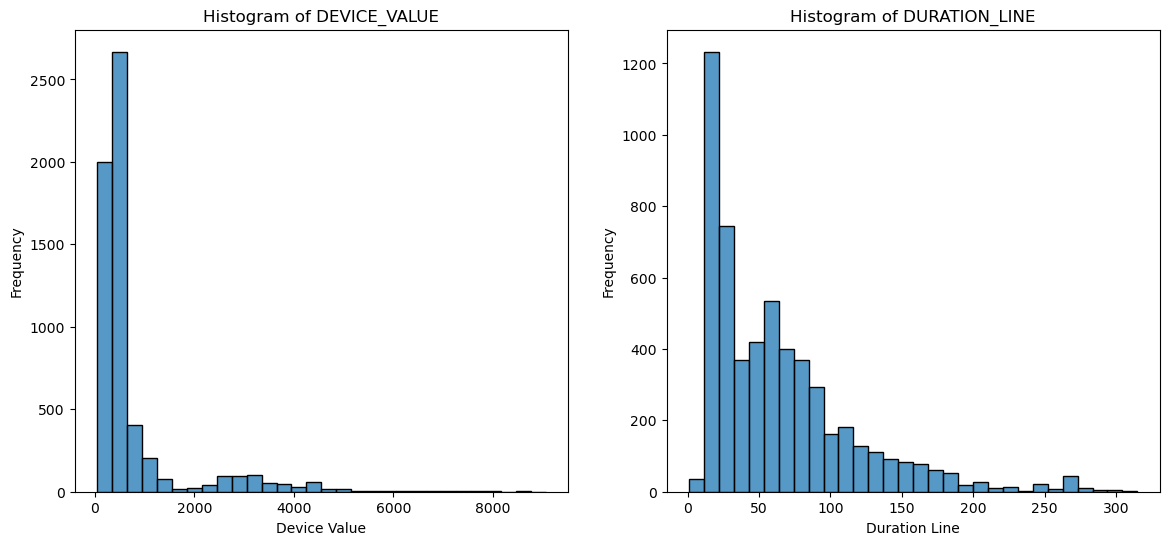

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram DEVICE_VALUE
ax1 = sns.histplot(df3['DEVICE_VALUE'], kde=False, ax=axes[0], bins=30)
ax1.set(title='Histogram of DEVICE_VALUE', xlabel='Device Value', ylabel='Frequency')

# Histogram DURATION_LINE
ax2 = sns.histplot(df3['DURATION_LINE'], kde=False, ax=axes[1], bins=30)
ax2.set(title='Histogram of DURATION_LINE', xlabel='Duration Line', ylabel='Frequency')

plt.show()

#### Histogram of DEVICE_VALUE
It shows a right-skewed and unimodal distribution, indicating that most device values are concentrated at lower values (less than 1000) with a long tail towards higher values. This suggests that it follows a negative exponential distribution.

#### Histogram of DURATION_LINE
It appears to be right-skewed and unimodal, with a peak towards the lower duration values approximately at duration 20. It is slightly right-skewed, indicating that while most durations are short, there are some instances of longer durations, but these are less frequent. It also follows a negative exponential distribution.


<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram comparing **VOICE\_TRAFFIC\_MONTH\_1** against **VOICE\_TRAFFIC\_MONTH\_6**, and **BILLING\_MONTH\_1** against **BILLING\_MONTH\_6**. Remember to include a title, labels on the x axis and y axis, and a legend.</font>

<font size="+1" color="red">Both plots should use logarithmic scale on the y axis</font>

<font size="+1" color="red">Include after both histograms your comment on the differences between month 1 and month 6.</font>

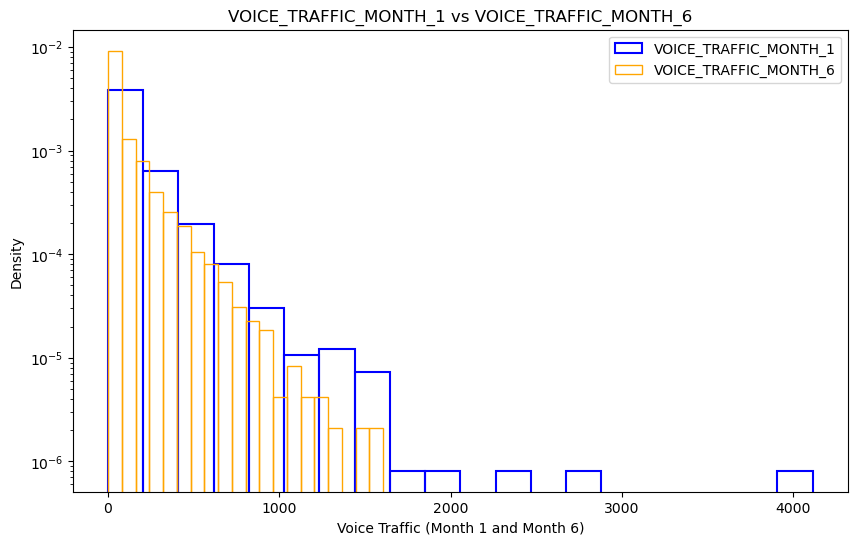

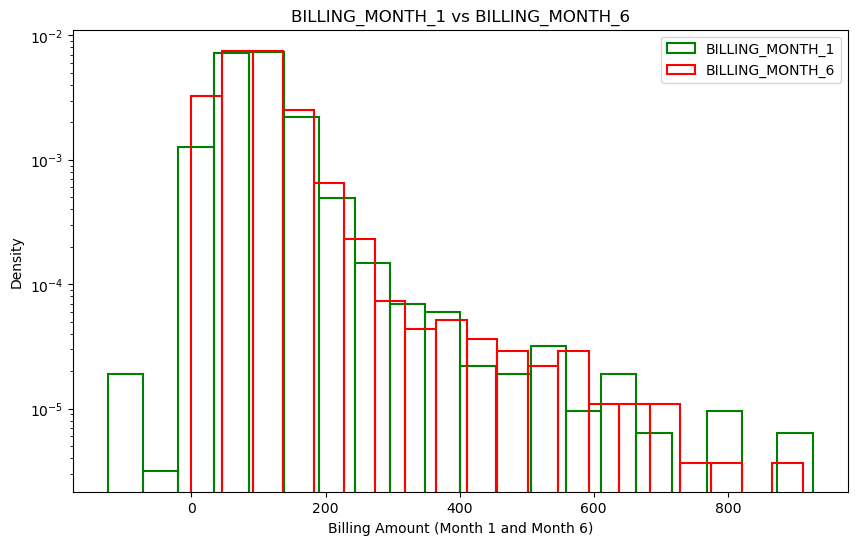

In [16]:
# VOICE_TRAFFIC_MONTH comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='VOICE_TRAFFIC_MONTH_1', stat='density', color='blue')
sns.histplot(data=df3, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='VOICE_TRAFFIC_MONTH_6', stat='density', color='orange')
plt.title('VOICE_TRAFFIC_MONTH_1 vs VOICE_TRAFFIC_MONTH_6')
plt.xlabel('Voice Traffic (Month 1 and Month 6)')
plt.ylabel('Density')
plt.yscale('log')  
plt.legend()
plt.show()

# BILLING_MONTH comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='BILLING_MONTH_1', bins=20, fill=False, label='BILLING_MONTH_1', stat='density', color='green')
sns.histplot(data=df3, x='BILLING_MONTH_6', bins=20, fill=False, label='BILLING_MONTH_6', stat='density', color='red')
plt.title('BILLING_MONTH_1 vs BILLING_MONTH_6')
plt.xlabel('Billing Amount (Month 1 and Month 6)')
plt.ylabel('Density')
plt.yscale('log')  
plt.legend()
plt.show()


#### Comparison of VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6
We clearly observe that VOICE_TRAFFIC_MONTH_1 has a higher density at lower traffic values compared to VOICE_TRAFFIC_MONTH_6, which shows a more dispersed distribution. This suggests that as time progresses from Month 1 to Month 6, there may be an increase in variability in voice traffic, potentially indicating changes in user behavior or service usage patterns.

#### Comparison of BILLING_MONTH_1 and BILLING_MONTH_6
The histogram of BILLING_MONTH_1 shows a more concentrated distribution around lower billing amounts (less than 0) compared to BILLING_MONTH_6, which has a wider spread. This may suggest that customers have increased their spending by Month 6. 

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

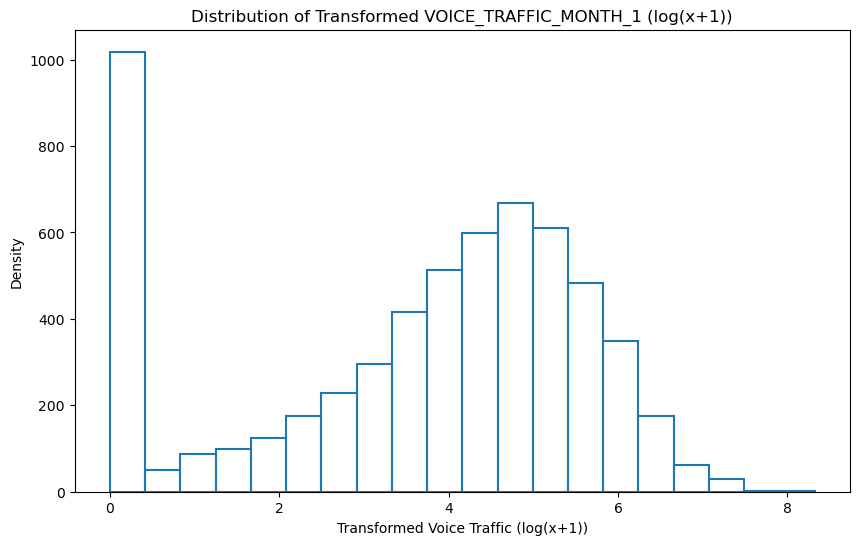

In [17]:
# Apply log(x + 1) transformation to VOICE_TRAFFIC_MONTH_1
df4 = df3.copy()
df4['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log(df4['VOICE_TRAFFIC_MONTH_1'] + 1)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df4, x='VOICE_TRAFFIC_MONTH_1_LOG', bins=20, fill=False)
plt.title('Distribution of Transformed VOICE_TRAFFIC_MONTH_1 (log(x+1))')
plt.xlabel('Transformed Voice Traffic (log(x+1))')
plt.ylabel('Density')
plt.show()


<font size="+1" color="red">Replace this cell with code to create three boxplots, each of them for one of the  variables **DATA\_TRAFFIC\_MONTH\_6**, **VOICE\_TRAFFIC\_MONTH\_6** and **BILLING\_MONTH\_6**. Remember to include a title and a label for the y axis.</font>

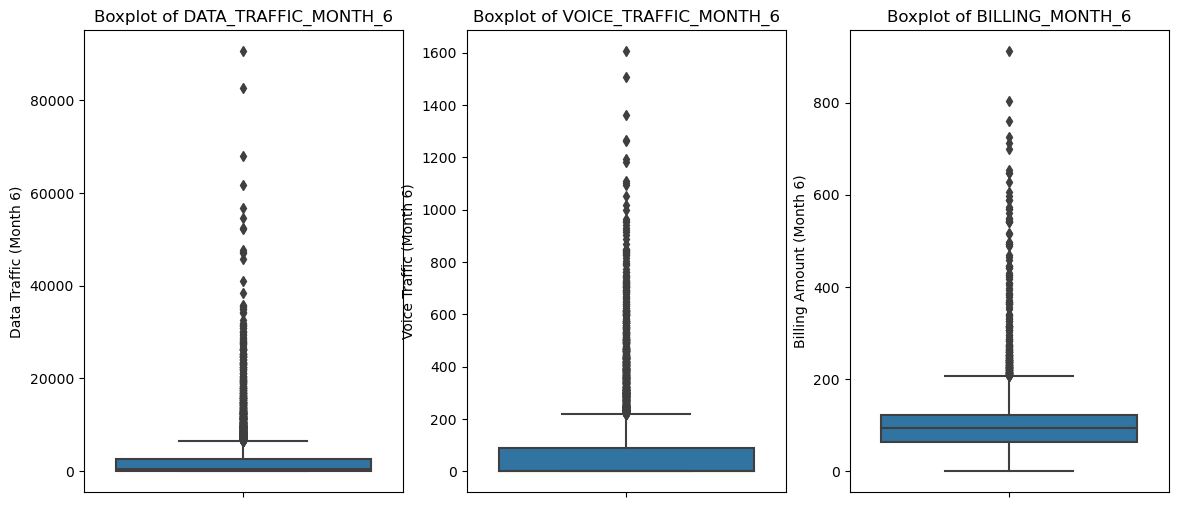

In [18]:
plt.figure(figsize=(14, 6))

# Boxplot DATA_TRAFFIC_MONTH_6
plt.subplot(1, 3, 1)
sns.boxplot(data=df4, y='DATA_TRAFFIC_MONTH_6')
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('Data Traffic (Month 6)')

# Boxplot VOICE_TRAFFIC_MONTH_6
plt.subplot(1, 3, 2)
sns.boxplot(data=df4, y='VOICE_TRAFFIC_MONTH_6')
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('Voice Traffic (Month 6)')

# Boxplot BILLING_MONTH_6
plt.subplot(1, 3, 3)
sns.boxplot(data=df4, y='BILLING_MONTH_6')
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('Billing Amount (Month 6)')

plt.show()


<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

From the boxplots above we can see in each of them a very high concentration of points that they cannot differ from each other but then we start to notice some points that appear to be "alone", which we will consider them outliers.

Therefore, by looking at the boxplots, for the DATA_TRAFFIC_MONTH_6 this threshold would be approximately at 50000, for the VOICE_TRAFFIC_MONTH_6 would be around 1100 and for the BILLING_MONTH_6 would be at 700.

However, it could be done more accurately by using the IQR method as follows:
-Lower Threshold: Q1 - 1.5 * IQR
-Upper Threshold: Q3 - 1.5 * IQR
-Outliers are values beyond these thresholds.

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

                       DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
DATA_TRAFFIC_MONTH_1                   1.00                  0.76   
DATA_TRAFFIC_MONTH_2                   0.76                  1.00   
DATA_TRAFFIC_MONTH_3                   0.73                  0.97   
DATA_TRAFFIC_MONTH_4                   0.70                  0.79   
DATA_TRAFFIC_MONTH_5                   0.66                  0.76   
DATA_TRAFFIC_MONTH_6                   0.62                  0.69   
VOICE_TRAFFIC_MONTH_1                  0.09                  0.08   
VOICE_TRAFFIC_MONTH_2                  0.07                  0.08   
VOICE_TRAFFIC_MONTH_3                  0.07                  0.08   
VOICE_TRAFFIC_MONTH_4                  0.07                  0.07   
VOICE_TRAFFIC_MONTH_5                  0.08                  0.08   
VOICE_TRAFFIC_MONTH_6                  0.05                  0.03   
BILLING_MONTH_1                        0.18                  0.19   
BILLING_MONTH_2                   

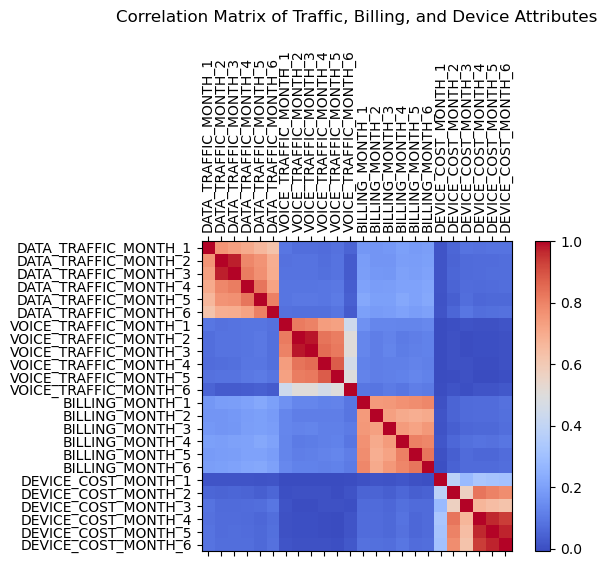

In [19]:
correlation_matrix = df4[columns_to_impute].corr(method='pearson', numeric_only=True)
print(correlation_matrix)

#Display correlation matrix
plt.figure(figsize=(6, 4))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')  # Create the heatmap
plt.colorbar()  #Show color scale

plt.xticks(ticks=np.arange(len(columns_to_impute)), labels=columns_to_impute, rotation=90)
plt.yticks(ticks=np.arange(len(columns_to_impute)), labels=columns_to_impute)

# Add title and show plot
plt.title('Correlation Matrix of Traffic, Billing, and Device Attributes', pad=20)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

The diagonal line (where each variable correlates with itself) will always show a correlation of 1, colored in red and the elements near them orange. Then the billing columns that are coloured in light blue indicate a positive correlation of around 0.4 with data traffic. On the other hand, the dark blue in billing columns indicates a low correlation with voice traffic and device cost.
Billing shows a higher correlation with data traffic compared to voice traffic. This suggests that the amount billed is more influenced by the data usage than by voice usage. This is because people spend more time in activities like streaming, browsing and social media rather than voice traffic.

## 2.3. Date management and period calculation

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [20]:
#Remove the NaN values from the column of LAST_DEVICE_CHANGE, since we don't care about them because they indicate that are not changed
not_null_col = df4['LAST_DEVICE_CHANGE'].dropna() 

# Float to integer
int_col = not_null_col.astype(int)

# Integer to string and maximum value
max_date_str = str(int_col.max())

# Compute latest and now
latest_change = datetime.datetime.strptime(max_date_str, '%Y%m%d')
print(latest_change)

now = latest_change + datetime.timedelta(days=30)
print(now)
display(df4)

2019-05-01 00:00:00
2019-05-31 00:00:00


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,VOICE_TRAFFIC_MONTH_1_LOG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,3.88
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,1.55
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.30
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple,5.17
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,20150622.00,NaN,42.00,iPhone 6S,Apple Inc,Apple,6.39
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,20170419.00,20.00,20.00,iPhone 7 Plus,Apple Inc,Apple,5.52
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,20130326.00,8.00,69.00,Samsung Galaxy J7,Samsung Korea,Samsung,4.49
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,20110214.00,NaN,94.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.68


<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [35]:
df5_device = df4.copy()

# Convert to datetime and compute difference
series_converted = pd.to_datetime(df5_device['LAST_DEVICE_CHANGE'], format='%Y%m%d')
difference = now - series_converted

# Get the number of months
months_difference = difference / (30 * datetime.timedelta(days=1))

# Fill NaN values with 0 and convert to integer
df5_device['MONTHS_LAST_DEVICE'] = months_difference.fillna(0).astype(int)

# Create a filtered copy of the dataframe so that rows with NaN values are not shown in the output
df5_device_filtered = df5_device.dropna(subset=['LAST_DEVICE_CHANGE'])

# Display the columns from the filtered DataFrame
df5_device_filtered[['LAST_DEVICE_CHANGE', 'MONTHS_LAST_DEVICE']]

,LAST_DEVICE_CHANGE,MONTHS_LAST_DEVICE
1,20170401.00,26
3,20171001.00,20
4,20190101.00,5
5,20170901.00,21
6,20150701.00,47
...,...,...
9990,20161001.00,32
9991,20150201.00,52
9992,20160101.00,41
9995,20170401.00,26


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable. Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [37]:
df6_line = df5_device.copy()

# Same process as before but without using any other variable, directly from the copy of the dataframe.
df6_line['LINE_ACTIVATION_DATE'] = pd.to_datetime(df6_line['LINE_ACTIVATION_DATE'], format='%Y%m%d', errors='coerce')

df6_line['DURATION_LINE'] = (now - df6_line['LINE_ACTIVATION_DATE']).dt.days

# Compute average in days and years
average_duration_days = df6_line['DURATION_LINE'].mean()
print('The average DURATION_LINE is: ', round(average_duration_days, 2), ' days')

average_duration_years = average_duration_days / 365
print('In years: ', round(average_duration_years,2))
display(df6_line)

The average DURATION_LINE is:  1950.77  days
In years:  5.34


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,VOICE_TRAFFIC_MONTH_1_LOG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,2004-12-20,0,5275.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,3.88
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,2017-04-05,26,786.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,1.55
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,2004-04-12,0,5527.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.30
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,2011-08-25,20,2836.00,iPhone 6,Apple Inc,Apple,5.17
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,2014-06-17,5,1809.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,0.00,0.00,0.00,2015-06-22,0,1439.00,iPhone 6S,Apple Inc,Apple,6.39
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,0.00,0.00,0.00,2017-04-19,26,772.00,iPhone 7 Plus,Apple Inc,Apple,5.52
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,9.00,9.00,9.00,2013-03-26,14,2257.00,Samsung Galaxy J7,Samsung Korea,Samsung,4.49
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,0.00,0.00,0.00,2011-02-14,0,3028.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,3.68



## 2.4. Standarization and scaling of numerical variables

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



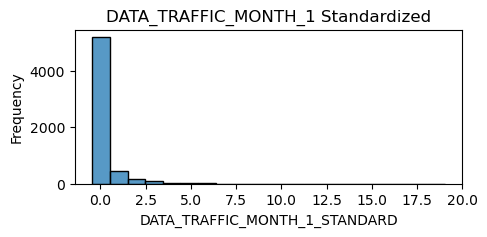

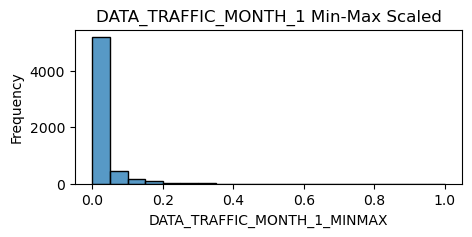

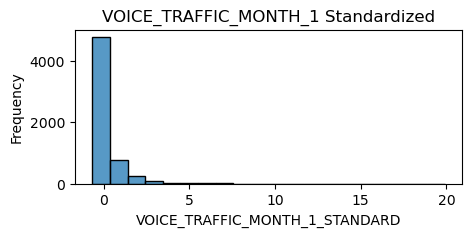

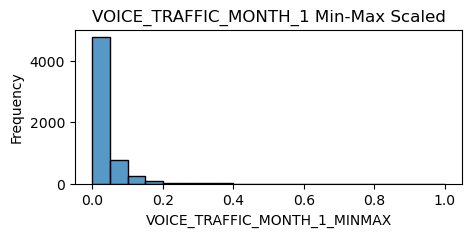

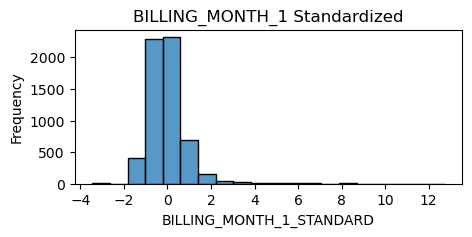

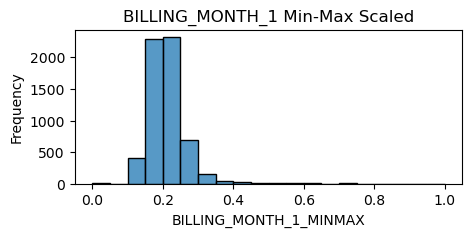

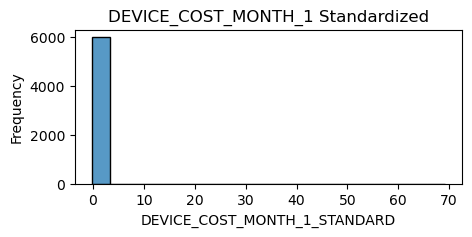

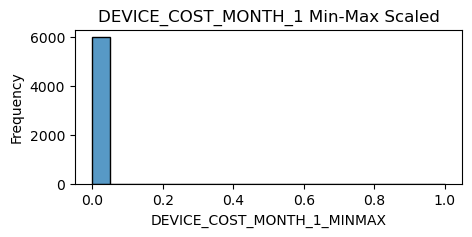

In [38]:
df7_scaled = df6_line.copy()

columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

# Go through the columns that we are interested in and scale them
for col in columns_to_scale:
    df7_scaled[col + '_STANDARD'] = StandardScaler().fit_transform(df7_scaled[[col]])
    df7_scaled[col + '_MINMAX'] = MinMaxScaler().fit_transform(df7_scaled[[col]])

# Go through the columns (already scaled) and plot a histogram for each of them
for col in columns_to_scale:
    
    # Plot the standarized histogram
    plt.figure(figsize=(5, 2))
    ax1 = sns.histplot(df7_scaled[col + '_STANDARD'], bins=20, kde=False)
    ax1.set(title=col + ' Standardized', xlabel= col + '_STANDARD', ylabel='Frequency')
    plt.show()
    
    # Plot the min-max histogram
    plt.figure(figsize=(5, 2))
    ax2 = sns.histplot(df7_scaled[col + '_MINMAX'], bins=20, kde=False)
    ax2.set(title= col + ' Min-Max Scaled', xlabel= col + '_MINMAX', ylabel='Frequency')
    plt.show()

## 2.5. Convert categorical columns to dummy binary variables

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

In [24]:
df8 = df7_scaled.copy()

df8['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df8['PREVIOUS_DEVICE_BRAND'])
df8[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']]

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3
...,...,...
9994,Apple,0
9995,Apple,0
9996,Samsung,4
9997,Motorola,2


<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

In [39]:
df9 = df8.copy()

# Convert to dummy
manufacturers_dummies = pd.get_dummies(df9['PREVIOUS_DEVICE_MANUF'], prefix='manuf')

# Join dummies to original dataframe
df9 = df9.join(manufacturers_dummies)

display(df9)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,manuf_Telit Communications SpA,manuf_Topmax Glory Limited,manuf_Umi Network Technology Co Limited,manuf_United Mobile,manuf_United Time Hong Kong Ltd,manuf_Vikin Communication Technology Co Limited,manuf_Vogtec (H.K) Co Ltd,manuf_Xiaomi Communications Co Ltd,manuf_ZTE Corporation,manuf_u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,False,False,False,False,False,False,False,False,False,False
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,False,False,False,False,False,False,False,False,False,False
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,False,False,False,False,False,False,False,False,False,False
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [44]:
# List of the prefixes
columns_groups = ['DATA_TRAFFIC', 'VOICE_TRAFFIC', 'BILLING', 'DEVICE_COST']

# Go through each column of the interested groups and calculate their corresponding statistics
for col in columns_groups:
    df10[col + '_MEAN'] = df10[[col + '_MONTH_' + str(i) for i in range(1, 7)]].mean(axis=1)
    df10[col + '_MAX'] = df10[[col + '_MONTH_' + str(i) for i in range(1, 7)]].max(axis=1)
    df10[col + '_MIN'] = df10[[col + '_MONTH_' + str(i) for i in range(1, 7)]].min(axis=1)
    df10[col + '_RANGE'] = df10[col + '_MAX'] - df10[col + '_MIN']
    
display(df10)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00,0.13
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00,0.10
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,289.80,176.41,204.96,160.57,44.39,0.00,0.00,0.00,0.00,0.00
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,134.00,52.49,52.97,51.67,1.30,0.00,0.00,0.00,0.00,0.00
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,88.50,134.99,134.99,134.99,0.00,9.00,9.00,9.00,0.00,0.07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,38.50,157.48,203.53,134.99,68.54,0.00,0.00,0.00,0.00,0.00


<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

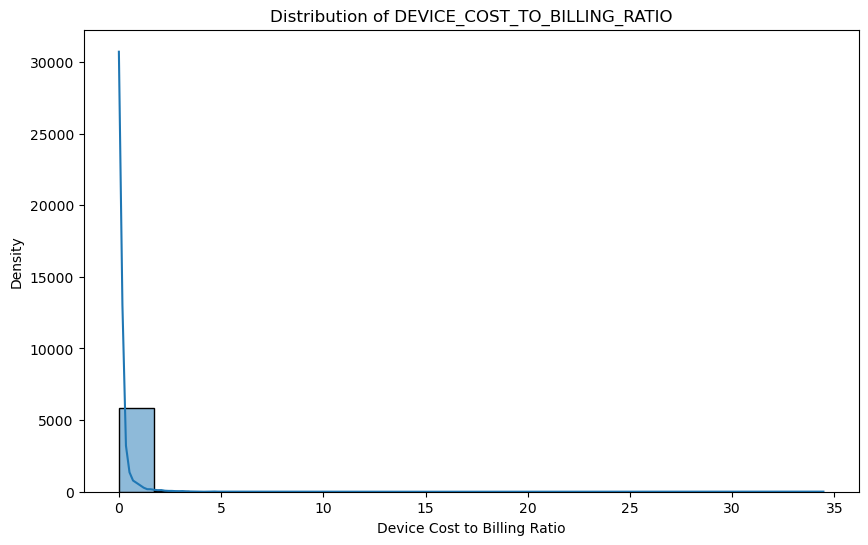

In [45]:
# Simply compute the ratio
df10['DEVICE_COST_TO_BILLING_RATIO'] = df10['DEVICE_COST_MEAN'] / df10['BILLING_MEAN']

# Plot the distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df10['DEVICE_COST_TO_BILLING_RATIO'], bins=20, kde=True)
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')
plt.xlabel('Device Cost to Billing Ratio')
plt.ylabel('Density')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

The distribution is right skewed and it resembles to a negative exponential distribution, indicating that while most values have a lower ratio, there are a few instances of much higher ratios. This suggests that a majority of devices have a cost that is relatively aligned with the billing amounts, but there are outliers where the device cost is too high compared to the "normal" billing.
This can be seen under the presence of a long tail on the right side of the distribution which indicates that there are outliers (devices with very high costs relative to the billing amounts).

## 2.7. Text parsing/processing

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [46]:
df11 = df10.copy()

#Split code and manufacturer by _ by adding one column for each
df11[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER_MODEL']] = df11['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)

# Split manufacturer and model by a blank space by adding one column for each
df11[['PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']] = df11['PURCHASED_DEVICE_MANUFACTURER_MODEL'].str.split(' ', n=1, expand=True)

# Note that we have an extra column for the model, so we drop the intermediate column
df11.drop(columns=['PURCHASED_DEVICE_MANUFACTURER_MODEL'], inplace=True)

display(df11)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,85.00,22.93,12.00,12.00,12.00,0.00,0.13,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,47.00,9.56,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,113.77,15.37,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,55.99,4.94,6.00,6.00,6.00,0.00,0.10,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,107.99,2.70,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.00,NaN,11032.32,5755.07,5755.07,5290.15,2917.55,4494.50,597.80,...,160.57,44.39,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.00,20170401.00,24526.07,14820.22,14820.22,19684.52,10024.09,7423.11,247.50,...,51.67,1.30,0.00,0.00,0.00,0.00,0.00,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,20180401.00,1007.77,335.02,335.02,171.91,555.69,425.70,88.50,...,134.99,0.00,9.00,9.00,9.00,0.00,0.07,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.00,NaN,189.18,155.55,155.55,51.76,62.37,230.53,38.50,...,134.99,68.54,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [47]:
# Create the first table for the number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER
devices_per_manufacturer_purchased = df11['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
devices_per_manufacturer_purchased.columns = ['Manufacturer', 'Number of Devices']

# Create the second table for the number of devices per manufacturer in PREVIOUS_DEVICE_MANUF
devices_per_manufacturer_previous = df11['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
devices_per_manufacturer_previous.columns = ['Manufacturer', 'Number of Devices']

display(devices_per_manufacturer_purchased)
display(devices_per_manufacturer_previous)

,Manufacturer,Number of Devices
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2


,Manufacturer,Number of Devices
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [48]:
train_set, test_set = train_test_split(df11, test_size=0.3, random_state=42)

print("Training set size:", train_set.shape[0])
print("Testing set size:", test_set.shape[0])

Training set size: 4191
Testing set size: 1797


<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [49]:
# Compute statistics for the training set
train_stats = train_set[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

# Compute statistics for the testing set
test_stats = test_set[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

# Display the statistics
print("Training Set Statistics:")
print(train_stats)
print("\nTesting Set Statistics:")
print(test_stats)


Training Set Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               4191.00                4191.00          4191.00
mean                2549.41                 132.02           100.03
std                 5612.93                 203.67            65.03
min                    0.00                   0.00          -124.49
25%                    0.00                  10.20            63.36
50%                  399.50                  64.20            92.99
75%                 2842.26                 171.55           121.14
max               112421.17                4113.00           911.72

Testing Set Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               1797.00                1797.00          1797.00
mean                2567.66                 127.12            98.42
std                 6135.75                 191.84            64.83
min                    0.00                   0.00           -21.0

Overall, the statistics between the training and testing sets show that they are relatively consistent, particularly in terms of the means and standard deviations for VOICE_TRAFFIC_MONTH_1 and BILLING_MONTH_1. However, DATA_TRAFFIC_MONTH_1 exhibits some differences, particularly in maximum values and the presence of potential outliers in the training set. This suggests that while the data is largely representative, there may be some variability that could impact model training and evaluation.

# 3. Comparing iPhone and Samsung J series users

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [32]:
# Dataframe with apple users
apple_df = df11[df11['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE']

# Dataframe with Samsung J users
samsung_df = df11[df11['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG']
samsung_df = samsung_df[samsung_df['PURCHASED_DEVICE_MODEL'].str.startswith('J')]

# Display the resulting DataFrames
display(apple_df)
display(samsung_df)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,160.90,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,303.20,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,117.30,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.00,20171001.00,8028.23,4791.40,4791.40,4890.19,6867.36,4825.10,31.40,...,69.99,3.00,84.23,252.70,0.00,252.70,1.17,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,3636.14,3975.19,3975.19,4893.02,4364.04,3992.30,18.50,...,69.99,0.47,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.00,20170101.00,1023.12,2831.42,2831.42,3015.21,2819.56,1135.82,51.70,...,123.99,3.00,13.00,13.00,13.00,0.00,0.10,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.00,20180101.00,2432.91,5159.85,5159.85,3041.39,2613.58,2976.49,85.40,...,69.99,0.00,0.00,0.00,0.00,0.00,0.00,DGAP08163000,APPLE,IPHONE XR 64GB PRETO


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,171.30,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,153.00,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.00,20140101.00,2047.26,1597.99,1597.99,1501.05,843.06,1631.07,74.40,...,183.99,5.64,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,873.00,20140101.00,4185.32,2036.57,2036.57,424.27,2934.92,2847.61,61.00,...,112.99,42.95,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.00,20170101.00,5344.53,3875.46,3875.46,2059.95,6818.61,2639.69,903.30,...,78.13,40.40,33.00,33.00,33.00,0.00,0.39,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.00,NaN,4343.87,5593.43,5593.43,4548.75,80.53,1497.05,10.60,...,117.99,3.15,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.00,20180201.00,0.00,0.00,0.00,0.00,0.00,0.00,161.30,...,69.99,8.27,13.00,13.00,13.00,0.00,0.18,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.00,20161001.00,5656.49,4798.87,4798.87,5056.85,4584.03,5088.20,104.70,...,102.99,110.23,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

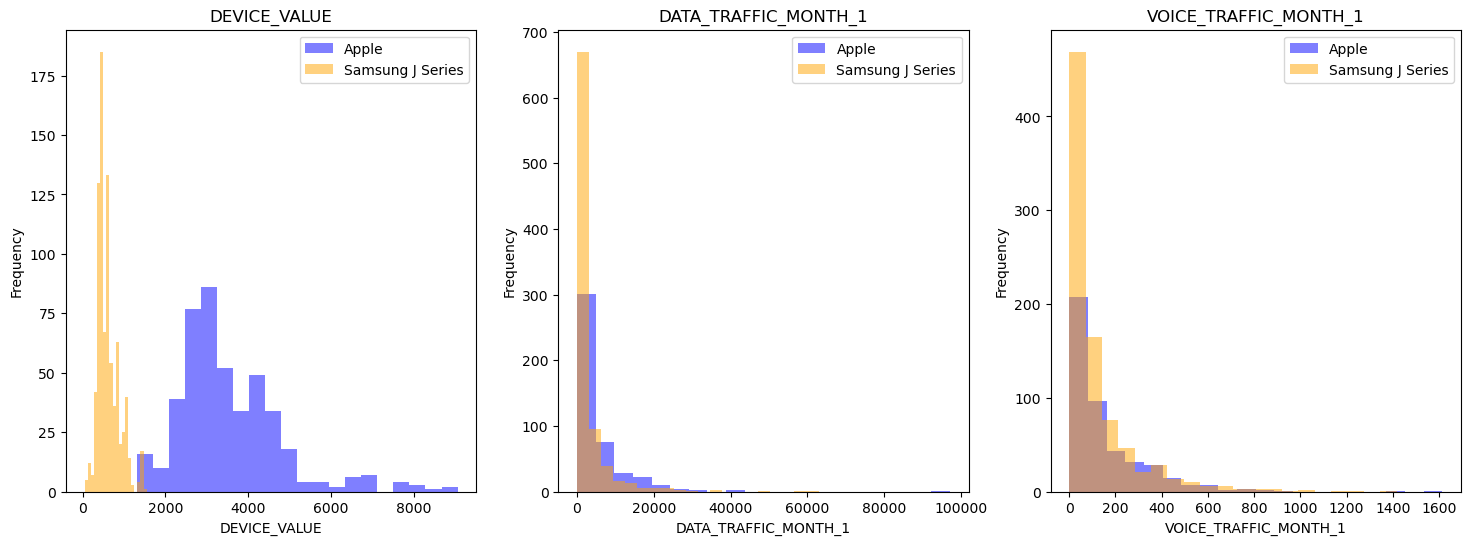

In [50]:
variables = ['DEVICE_VALUE', 'DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histograms for each variable
for i, var in enumerate(variables):
    axs[i].hist(apple_df[var], bins=20, alpha=0.5, label='Apple', color='blue')
    axs[i].hist(samsung_df[var], bins=20, alpha=0.5, label='Samsung J Series', color='orange')
    axs[i].set_title(var)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

Device Value: Apple iPhone users tend to have higher device values compared to Samsung J series users. This is expected as Apple devices are generally more expensive.

Data Traffic (Month 1): Data usage is significantly higher among Samsung J series users, possibly indicating a preference for data-intensive applications or a more cost-conscious approach to mobile devices.

Voice Traffic (Month 1): The voice traffic distribution is quite similar for both groups, but there are slight variations, with Samsung J series users showing slightly higher values on average.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>